<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 4 - AutoEncoder
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [ ]:
# Set your student number
student_number = 98000000
Name = 'Ahmad'
Last_Name = 'Salimi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Aban 8th 23:59:59. you can use up to 7 grace days for this assignment and the hard deadline is Aban 15th 23:59:59.

In [ ]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

# Autoencoders (20 Points)

<font size=4>
Author: Ahmad Salimi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In this problem, you should implement an autoencoder network, which generates an image presenting the next digit of the input digit. Here are some examples:

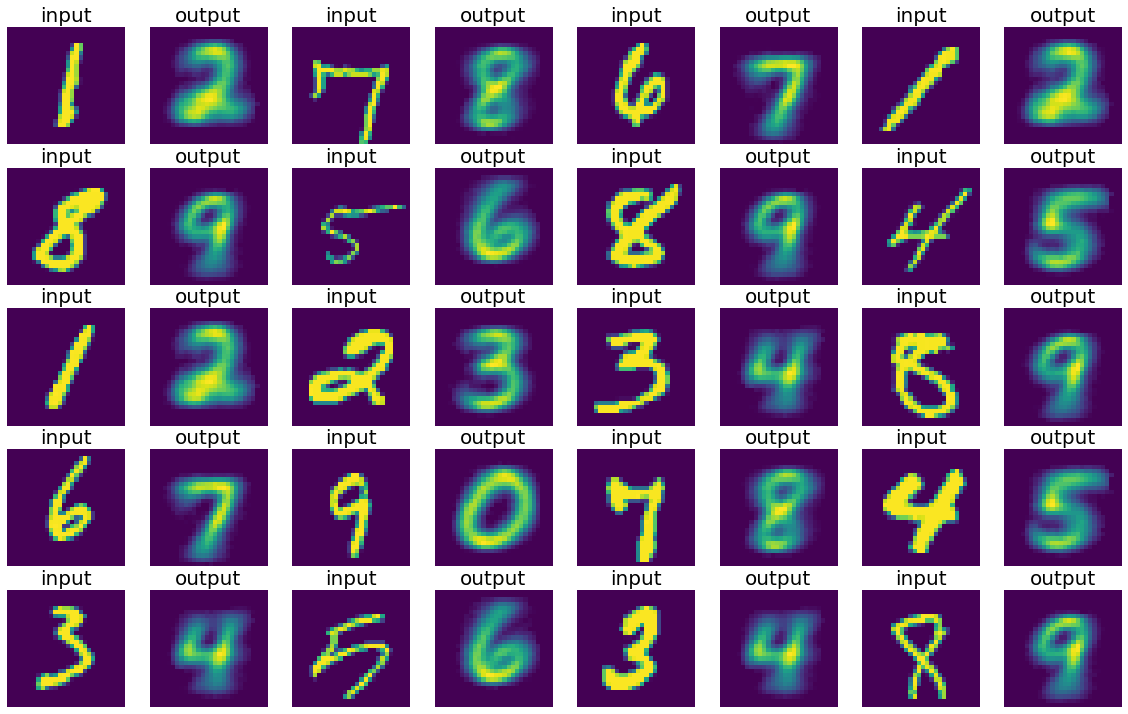

You should use the MNIST dataset, and the ground-truth for each example is provided by a helper function. Make sure to put the `ae_helper.py` file next to this notebook to use the helper function.

In [1]:
# place for your custom functions for Q1 here
import tqdm

import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.nn import functional as F


device = 'cuda' if torch.cuda.is_available() else 'cpu'

def train_autoencoder(model: nn.Module, optimizer: torch.optim.Optimizer, dataloader: DataLoader) -> float:
    epoch_loss = 0
    iter = 0

    model.train()
    with tqdm.tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for iter, (X, Y, _) in pbar:
            X = X.to(device)
            Y = Y.to(device)
            P = model(X)

            loss = F.mse_loss(P, Y)
            epoch_loss += float(loss)
            pbar.set_description(f'Loss: {epoch_loss / (iter + 1):.3e}')
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()
    
    epoch_loss /= (iter + 1)
    return epoch_loss


def eval_autoencoder(model: nn.Module, dataloader: DataLoader) -> float:
    epoch_loss = 0
    iter = 0

    model.eval()
    with torch.no_grad(), tqdm.tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for iter, (X, Y, _) in pbar:
            X = X.to(device)
            Y = Y.to(device)
            P = model(X)

            loss = F.mse_loss(P, Y)
            epoch_loss += float(loss)
            pbar.set_description(f'Loss: {epoch_loss / (iter + 1):.3e}')
    
    epoch_loss /= (iter + 1)
    return epoch_loss

device

'cuda'

## Get the data

Get the data and split them into training, validation, and test sets, by running the following cell. `X` is the input images, `Y` is the ground-truth for each input, and `y` is the input's label.

In [2]:
from ae_helper import get_data
from sklearn.model_selection import train_test_split

X, Y, y = get_data()

X_train, X_test, Y_train, Y_test, y_train, y_test = train_test_split(X, Y, y, test_size=0.2, random_state=17)
X_train, X_val, Y_train, Y_val, y_train, y_val = train_test_split(X_train, Y_train, y_train, test_size=0.1, random_state=17)

## Design your model

Please Implement your autoencoder model below. You MUST implement your model using the `torch` package. The model should input a batch of images and output the generated images for the whole batch. Your model can be consist of fully connected layers (using linear layers), but using fully-convolutional models has extra points.

In [3]:
#### IMPLEMENT YOUR MODEL ####
import torch
from torch import nn

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.ae = nn.Sequential(                            # B 1   28  28
            nn.BatchNorm2d(num_features=1),
            nn.Conv2d(1, 64, 3, stride=1, padding=3),       # B 64  32  32  
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 3, stride=1, padding=1),      # B 64  32  32
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 64  16  16
            nn.Dropout2d(0.2, inplace=True),
            nn.BatchNorm2d(num_features=64),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),     # B 128 16  16
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),    # B 128 16  16
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 128 8   8
            nn.Dropout2d(0.2, inplace=True),
            nn.BatchNorm2d(num_features=128),
            nn.Conv2d(128, 256, 3, stride=1, padding=1),    # B 256 8   8
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 256, 3, stride=1, padding=1),    # B 256 8   8
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 256 4   4
            nn.Dropout2d(0.2, inplace=True),
            nn.BatchNorm2d(num_features=256),
            nn.Conv2d(256, 512, 3, stride=1, padding=1),    # B 512 4   4
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 512, 3, stride=1, padding=1),    # B 512 4   4
            nn.LeakyReLU(0.2, inplace=True),
            nn.MaxPool2d(2, stride=2, padding=0),           # B 512 2   2
            nn.Dropout2d(0.2, inplace=True),
            nn.BatchNorm2d(512),
            nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),   # B 256 4   4
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 256, 3, stride=1, padding=1),                        # B 256 4   4
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),   # B 128 8   8
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),                        # B 128 8   8
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),    # B 64  16  16
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 3, stride=1, padding=1),                          # B 64  16  16
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1, bias=False),     # B 64  32  32
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 32, 3, stride=1, padding=0),                          # B 64  30  30
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 1, 3, stride=1, padding=0),                           # B 1   28  28
            nn.ReLU(inplace=True)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # B 28  28
        x = x.unsqueeze(1)
        x = self.ae(x)
        x = x.squeeze(1)
        x = x.clamp(0, 1)
        return x

## The dataset class, and the dataloaders

The following cells implement the dataset class and create the data loaders for training and validation sets. Feel free to modify the batch size for each data loader.

In [4]:
from typing import Tuple
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class MnistNextDigitDataset(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
        self.y = torch.from_numpy(y)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, i: int) -> Tuple[torch.Tensor, ...]:
        return self.X[i], self.Y[i], self.y[i]

In [5]:
train_dataloader = DataLoader(
    MnistNextDigitDataset(X_train, Y_train, y_train),
    batch_size=512,
    shuffle=True
)
val_dataloader = DataLoader(
    MnistNextDigitDataset(X_val, Y_val, y_val),
    batch_size=1024,
    shuffle=False
)

## Instantiate the model and optimizer

Instantiate your model and optimizer in the following cell. Feel free to choose the optimizer and its configurations such as learning rate, decay, etc.

In [6]:
#### INSTANTIATE YOUR MODEL AND OPTIMIZER ####
ae = AutoEncoder().to(device=device)
optimizer = torch.optim.Adam(ae.parameters(), lr=1e-3)

## Train your autoencoder

Write your training/validation loop in the following cell for an arbitrary number of epochs (until convergence is detected). Make sure to use proper and readable logging containing training and validation metrics for each epoch. Select and store the state dictionary of the best epoch model according to the metrics.

In [7]:
#### IMPLEMENT YOUR TRAIN/VAL LOOP ####
from time import time
epochs = 20

train_loss = []
val_loss = []

best_val_loss = float('inf')

for e in range(epochs):

    start_time = time()

    epoch_train_loss = train_autoencoder(ae, optimizer, train_dataloader)
    epoch_val_loss = eval_autoencoder(ae, val_dataloader)

    end_time = time()

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        print('saving model')
        torch.save(ae.state_dict(), 'mnist-ae.pt')

    print(f'Epoch {e+1:3} finished in {end_time - start_time:.2f}s - Train loss: {epoch_train_loss:.2e} - Val loss: {epoch_val_loss:.2e}')

    train_loss.append(epoch_train_loss)
    val_loss.append(epoch_val_loss)

Loss: 5.834e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


saving model
Epoch   1 finished in 79.73s - Train loss: 6.95e-02 - Val loss: 5.83e-02


Loss: 5.515e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


saving model
Epoch   2 finished in 78.99s - Train loss: 5.61e-02 - Val loss: 5.52e-02


Loss: 5.451e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


saving model
Epoch   3 finished in 78.88s - Train loss: 5.49e-02 - Val loss: 5.45e-02


Loss: 5.451e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch   4 finished in 78.87s - Train loss: 5.46e-02 - Val loss: 5.45e-02


Loss: 5.434e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


saving model
Epoch   5 finished in 78.89s - Train loss: 5.45e-02 - Val loss: 5.43e-02


Loss: 5.430e-02: 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]


saving model
Epoch   6 finished in 78.96s - Train loss: 5.44e-02 - Val loss: 5.43e-02


Loss: 5.422e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


saving model
Epoch   7 finished in 78.96s - Train loss: 5.43e-02 - Val loss: 5.42e-02


Loss: 5.434e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch   8 finished in 79.03s - Train loss: 5.43e-02 - Val loss: 5.43e-02


Loss: 5.420e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


saving model
Epoch   9 finished in 78.98s - Train loss: 5.42e-02 - Val loss: 5.42e-02


Loss: 5.427e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch  10 finished in 78.96s - Train loss: 5.42e-02 - Val loss: 5.43e-02


Loss: 5.420e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch  11 finished in 79.01s - Train loss: 5.42e-02 - Val loss: 5.42e-02


Loss: 5.421e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


Epoch  12 finished in 79.00s - Train loss: 5.41e-02 - Val loss: 5.42e-02


Loss: 5.423e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch  13 finished in 79.03s - Train loss: 5.41e-02 - Val loss: 5.42e-02


Loss: 5.423e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


Epoch  14 finished in 78.98s - Train loss: 5.40e-02 - Val loss: 5.42e-02


Loss: 5.433e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch  15 finished in 79.00s - Train loss: 5.41e-02 - Val loss: 5.43e-02


Loss: 5.422e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch  16 finished in 79.06s - Train loss: 5.40e-02 - Val loss: 5.42e-02


Loss: 5.425e-02: 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]


Epoch  17 finished in 78.98s - Train loss: 5.40e-02 - Val loss: 5.42e-02


Loss: 5.427e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


Epoch  18 finished in 78.94s - Train loss: 5.40e-02 - Val loss: 5.43e-02


Loss: 5.429e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]


Epoch  19 finished in 79.06s - Train loss: 5.39e-02 - Val loss: 5.43e-02


Loss: 5.427e-02: 100%|██████████| 6/6 [00:03<00:00,  1.73it/s]

Epoch  20 finished in 79.02s - Train loss: 5.39e-02 - Val loss: 5.43e-02


## Load the state dictionary of the best epoch

Load the state dictionary of the best epoch model into the model object.

In [8]:
#### LOAD THE BEST EPOCH STATE DICTIONARY ####
ae.load_state_dict(torch.load('mnist-ae.pt'))

<All keys matched successfully>

## Visualize your model

Select 40 examples from the test set and visualize the input and output of the model for them (See the examples at the beginning of the notebook).

In [10]:
#### VISUALIZE YOUR MODEL ####
import matplotlib.pyplot as plt
import numpy as np
import torch

rnd = np.random.choice(np.arange(X_test.shape[0]), size=40)
selectedX = torch.from_numpy(X_test[rnd]).to(device)
selectedP = ae(selectedX)

fig = plt.figure(figsize=(20, 8))
for i, (Xi, Pi) in enumerate(zip(selectedX, selectedP)):
    fig.add_subplot(5, 16, 2 * i + 1)
    plt.imshow(Xi.cpu().numpy())
    plt.title('input', fontsize=10)
    plt.axis('off')

    fig.add_subplot(5, 16, 2 * i + 2)
    plt.imshow(Pi.detach().cpu().numpy())
    plt.title('output', fontsize=10)
    plt.axis('off')

plt.show()